## 3. Surviving logistic regression.

In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [50]:
should_apply_smote = True

In [51]:
dataset_path = '../data/dataset.csv'
df = pd.read_csv(dataset_path)

In [52]:
# Remove irrelevant or non-numeric columns.
df = df.drop(columns=[
    'id',
    'diagnosis_date',
    'end_treatment_date',
    'country'
])

# Convert categorical columns to dummy/one-hot encoding.
X = df.drop(columns='survived')
X = pd.get_dummies(X, drop_first=True)

# Target.
y = df['survived']

# Apply SMOTE to balance the dataset.
if should_apply_smote:
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)

# Split into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create and train the model.
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

# Predict.
y_pred = model.predict(X_test)

# Evaluate.
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.654407561995975
Confusion Matrix:
 [[133165  74763]
 [ 69141 139329]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65    207928
           1       0.65      0.67      0.66    208470

    accuracy                           0.65    416398
   macro avg       0.65      0.65      0.65    416398
weighted avg       0.65      0.65      0.65    416398



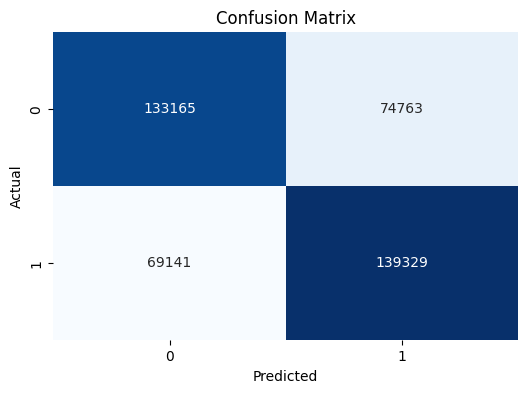

In [53]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()